In [1]:
import cv2
import numpy as np
from IPython.display import clear_output
from IPython.display import Image as IPyImage
from io import BytesIO
import PIL.Image
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
import time

In [2]:
def array_to_image(a, fmt='jpeg'):
    # Convert the numpy array to a PIL image and then to an IPython Image
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return IPyImage(data=f.getvalue())

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')


In [3]:
# monitor (output) frame buffer size
frame_out_w = 640
frame_out_h = 480
# camera (input) configuration
frame_in_w = 320
frame_in_h = 240

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w)
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h)

print("Capture device is open: " + str(videoIn.isOpened()))


Capture device is open: True


In [4]:
scale_factor = 0.5 # reduce the latency by scaling down

## Haar cascade detection

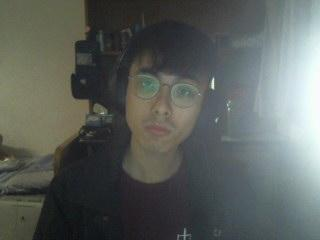

Webcam released.


In [5]:
try:
    while True:
        ret, frame = videoIn.read()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        frame_resized = cv2.resize(frame_rgb, (0, 0), fx=scale_factor, fy=scale_factor)
        gray = cv2.cvtColor(frame_resized, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            x, y, w, h = int(x/scale_factor), int(y/scale_factor), int(w/scale_factor), int(h/scale_factor)  
            cv2.rectangle(frame_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame_rgb[y:y + h, x:x + w]

            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                ex, ey, ew, eh = int(ex/scale_factor), int(ey/scale_factor), int(ew/scale_factor), int(eh/scale_factor)  
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        clear_output(wait=True)
        display(array_to_image(frame_rgb))


except KeyboardInterrupt:
    videoIn.release()
    print("Webcam released.")